# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
#Longitude values are measured relative to the prime meridian. 
#They range from -180° when traveling west to 180° when traveling east. 

## Generate Cities List

In [4]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#Draw samples from a uniform distribution.

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [5]:
#print(cities)
#print(cities[608])
#print(type(cities))
print(cities[:5])

['torbay', 'vardo', 'abbeville', 'usinsk', 'llallagua']


In [6]:
# a different loops method

#for i in range(len(my_list)):
 #   print(i)
  #  print(my_list[i])

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Your code here. A loop maybe? 
cities_weather = []

#iterate through city names  
for index, i in enumerate(cities):
    print(index)
    
    #make the API call
    req = requests.get(base_url + f'&q={cities[index]}').json()
    time.sleep(1)
    
    #store the information in a data structure
    cities_weather.append(req)

#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often. 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
print(type(cities_weather))

<class 'list'>


### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [79]:
weather_df = pd.DataFrame(cities_weather)
weather_table = weather_df.set_index("name")
weather_table


,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,cod,message,rain
name,,,,,,,,,,,,,,
Torbay,"{'lon': -52.73, 'lat': 47.67}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 45.41, 'feels_like': 37.96, 'temp_min...",10000.0,"{'speed': 8.05, 'deg': 50}",{'all': 75},1.600639e+09,"{'type': 1, 'id': 998, 'country': 'CA', 'sunri...",-9000.0,6167817.0,200,NaN,NaN
Vardø,"{'lon': 31.11, 'lat': 70.37}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 41, 'feels_like': 25.63, 'temp_min': ...",10000.0,"{'speed': 23.04, 'deg': 250}",{'all': 75},1.600639e+09,"{'type': 1, 'id': 1666, 'country': 'NO', 'sunr...",7200.0,777019.0,200,NaN,NaN
Abbeville,"{'lon': 1.83, 'lat': 50.1}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 59.04, 'feels_like': 56.46, 'temp_min...",10000.0,"{'speed': 5.61, 'deg': 58}",{'all': 64},1.600639e+09,"{'type': 3, 'id': 2011713, 'country': 'FR', 's...",7200.0,3038789.0,200,NaN,NaN
Usinsk,"{'lon': 57.53, 'lat': 65.99}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 38.7, 'feels_like': 30.38, 'temp_min'...",10000.0,"{'speed': 9.95, 'deg': 244}",{'all': 100},1.600639e+09,"{'country': 'RU', 'sunrise': 1600652968, 'suns...",10800.0,863061.0,200,NaN,NaN
Llallagua,"{'lon': -66.63, 'lat': -18.42}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 48.02, 'feels_like': 39.31, 'temp_min...",10000.0,"{'speed': 9.17, 'deg': 308}",{'all': 77},1.600639e+09,"{'country': 'BO', 'sunrise': 1600597047, 'suns...",-14400.0,3911409.0,200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bogorodskoye,"{'lon': 37.88, 'lat': 56.55}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 42.57, 'feels_like': 34.9, 'temp_min'...",10000.0,"{'speed': 8.75, 'deg': 260}",{'all': 76},1.600640e+09,"{'country': 'RU', 'sunrise': 1600657923, 'suns...",10800.0,575521.0,200,NaN,NaN
Santa Cruz de la Sierra,"{'lon': -63.17, 'lat': -17.8}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 79.92, 'feels_like': 78.26, 'temp_min...",7000.0,"{'speed': 3.36, 'deg': 110}",{'all': 75},1.600640e+09,"{'type': 1, 'id': 8616, 'country': 'BO', 'sunr...",-14400.0,3904906.0,200,NaN,NaN
Rawson,"{'lon': -65.1, 'lat': -43.3}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 46.69, 'feels_like': 36.14, 'temp_min...",10000.0,"{'speed': 12.57, 'deg': 138}",{'all': 0},1.600640e+09,"{'country': 'AR', 'sunrise': 1600596740, 'suns...",-10800.0,3839307.0,200,NaN,NaN


In [94]:
coordinates = pd.DataFrame(weather_table.iloc[:,0])
coordinates

,coord
name,
Torbay,"{'lon': -52.73, 'lat': 47.67}"
Vardø,"{'lon': 31.11, 'lat': 70.37}"
Abbeville,"{'lon': 1.83, 'lat': 50.1}"
Usinsk,"{'lon': 57.53, 'lat': 65.99}"
Llallagua,"{'lon': -66.63, 'lat': -18.42}"
...,...
Bogorodskoye,"{'lon': 37.88, 'lat': 56.55}"
Santa Cruz de la Sierra,"{'lon': -63.17, 'lat': -17.8}"
Rawson,"{'lon': -65.1, 'lat': -43.3}"


In [109]:
coordinates2 = pd.DataFrame(weather_table.iloc[1,1])
coordinates2

,id,main,description,icon
0,803,Clouds,broken clouds,04n


In [99]:
coordinates_alternate = pd.DataFrame(weather_table.loc[:,"weather"])
coord_df = pd.DataFrame(data=coordinates_alternate)
coord_df

KeyError: 0

In [50]:
for lab, row in weather_df.iterrows():
    print(lab)
    print(row)

0
coord                             {'lon': -52.73, 'lat': 47.67}
weather       [{'id': 803, 'main': 'Clouds', 'description': ...
base                                                   stations
main          {'temp': 45.41, 'feels_like': 37.96, 'temp_min...
visibility                                                10000
wind                                 {'speed': 8.05, 'deg': 50}
clouds                                              {'all': 75}
dt                                                  1.60064e+09
sys           {'type': 1, 'id': 998, 'country': 'CA', 'sunri...
timezone                                                  -9000
id                                                  6.16782e+06
name                                                     Torbay
cod                                                         200
message                                                     NaN
rain                                                        NaN
Name: 0, dtype: object
1
coord        

In [32]:
d = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [4]:
#My objective is to build a series of scatter plots to showcase the following relationships:

#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

#so these are the values I want to convert into a dataframe

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

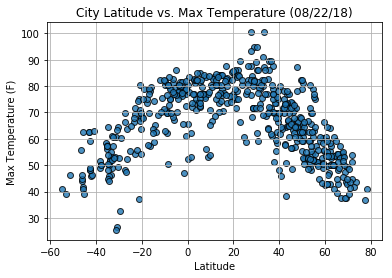

#### Latitude vs. Humidity Plot

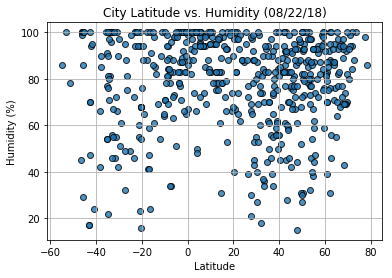

#### Latitude vs. Cloudiness Plot

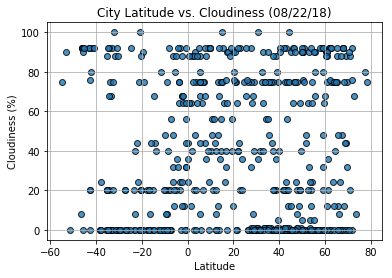

#### Latitude vs. Wind Speed Plot

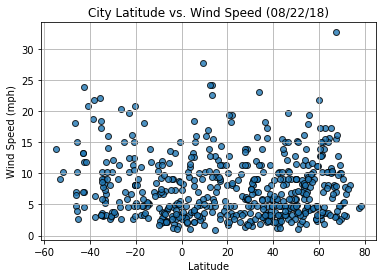

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 